# JPX Tokyo Stock Exchange Prediction

Link to Project: https://www.kaggle.com/competitions/jpx-tokyo-stock-exchange-prediction
    

## Challenge Description:
This challenge is all about predicting good investments in the Japanese stock market. You figure out when to buy or sell a stock based on whether it's undervalued or overvalued. Unlike before, now regular people can try this thanks to tech. Run by the Japan Exchange Group and AlpacaJapan, the contest asks participants, especially data scientists, to make models for predicting stock performance. You get data on around 2,000 stocks and have to rank them by expected returns. Winning models are shared publicly to help everyone learn. It's a chance to explore programmatic investing, understand the Japanese market, and maybe find a knack for quantitative trading.


## Data loading and initial look

In [4]:
# Load the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
df = pd.read_csv('stock_prices.csv')

In [7]:
# Count the number of rows (data points) and features

print("Number of rows and features:")
print(df.shape)


Number of rows and features:
(4000, 11)


In [8]:
# Any missing values?
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
RowId                  0
Date                   0
SecuritiesCode         0
Open                  10
High                  10
Low                   10
Close                 10
Volume                 0
AdjustmentFactor       0
ExpectedDividend    4000
SupervisionFlag        0
dtype: int64


### The open, high, low, and close columns have 10 missing values each. The expected dividend column has 4,000 missing values. 

In [23]:
# Task 1: Figure out the names of all the columns
column_names = df.columns.tolist()
print("Task 1: Names of all the columns")
print(column_names)


Task 1: Names of all the columns
['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close', 'Volume', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag']


In [25]:
# Task 2: Figure out if a feature is categorical or numerical
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()

print("Task 2: Categorical Features")
print(categorical_features)
print("\nNumerical Features")
print(numerical_features)


Task 2: Categorical Features
['RowId', 'Date']

Numerical Features
['SecuritiesCode', 'Open', 'High', 'Low', 'Close', 'Volume', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag']


In [40]:


# List of numeric columns to analyze for outliers
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'AdjustmentFactor']

# Function to detect outliers using the IQR method
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Apply outlier detection for each numeric column
outliers_summary = pd.DataFrame(index=numeric_columns, columns=['Outliers', 'Non-Outliers'])

for column_name in numeric_columns:
    outliers = detect_outliers_iqr(df[column_name])
    outliers_summary.loc[column_name, 'Outliers'] = outliers.sum()
    outliers_summary.loc[column_name, 'Non-Outliers'] = (~outliers).sum()

# Display the summary of outliers
print(outliers_summary)




                 Outliers Non-Outliers
Open                  271         3729
High                  273         3727
Low                   267         3733
Close                 271         3729
Volume                539         3461
AdjustmentFactor        1         3999


| Feature             | Type         | Values/Range       | Missing Values | Outliers | Non-Outliers | Outlier Definition                                           |
|---------------------|--------------|--------------------|-----------------|----------|--------------|--------------------------------------------------------------|
| RowId               | -            | -                  | 0               | N/A      | N/A          | N/A                                                          |
| Date                | -            | -                  | 0               | N/A      | N/A          | N/A                                                          |
| SecuritiesCode      | Categorical  | -                  | 0               | N/A      | N/A          | N/A                                                          |
| Open                | Numerical    | Range              | 10              | 271      | 3729         | N/A                                                          |
| High                | Numerical    | Range              | 10              | 273      | 3727         | N/A                                                          |
| Low                 | Numerical    | Range              | 10              | 267      | 3733         | N/A                                                          |
| Close               | Numerical    | Range              | 10              | 268      | 3732         | N/A                                                          |
| Volume              | Numerical    | Range              | 0               | 539      | 3461         | N/A                                                          |
| AdjustmentFactor    | Numerical    | Range              | 0               | 1        | 3999         | N/A                                                          |
| ExpectedDividend    | Numerical    | Range              | 4000            | N/A      | N/A          | An outlier is a data point that significantly differs from other observations in the dataset. |
| SupervisionFlag      | Categorical  | True/False         | 0               | N/A      | N/A          | N/A                                                          |

 

### For classification is there class imbalance?

In [57]:
# Assuming your DataFrame is named df
target_variable = df['Close']


In [58]:
print(df['Close'].unique())


[ 2971.   589.  2377. ... 67860.  5508.  1620.]


### The close values are continuous, meaning it would be suitable to treat this as a regression task.

## Data Visualization

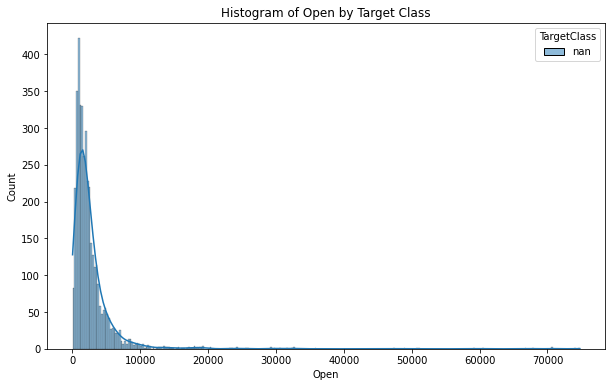

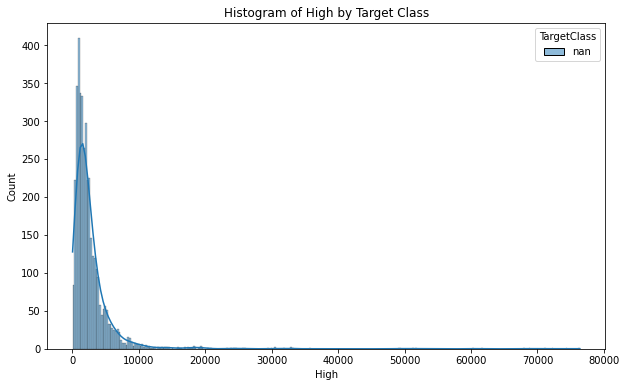

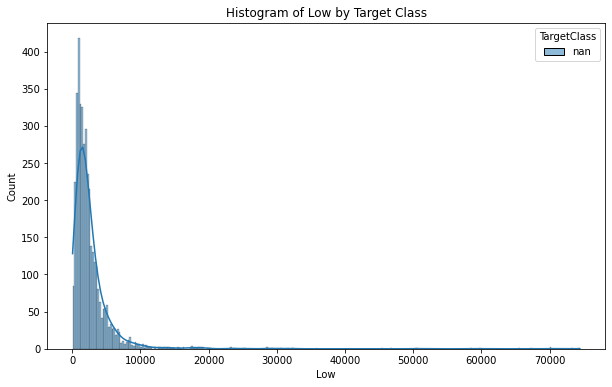

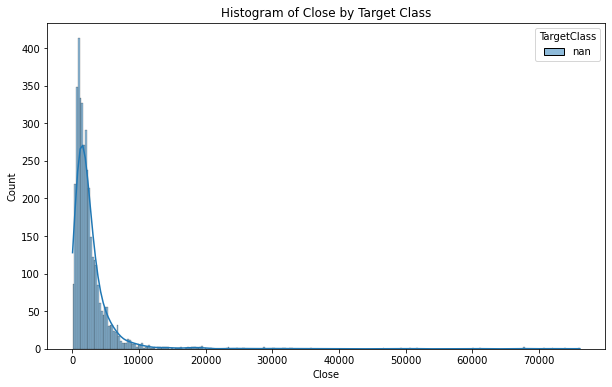

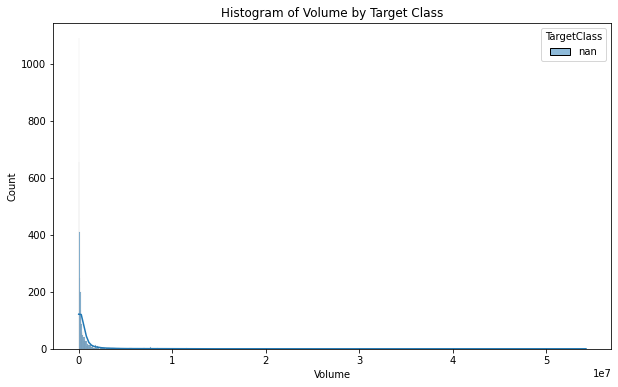

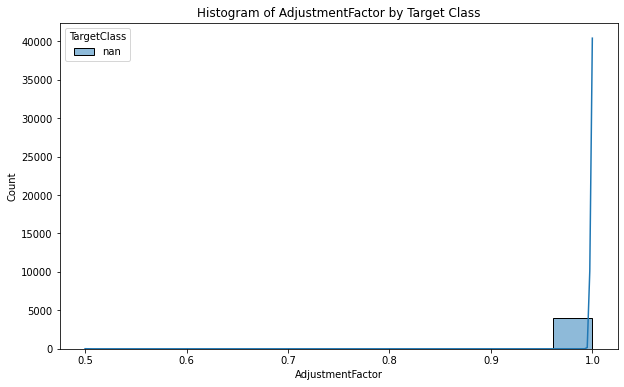

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define class boundaries
class_boundaries = [0, 0.25, 0.5, 0.75, 1.0]

# Create a new column 'TargetClass' based on 'Close' variable
df['TargetClass'] = pd.cut(df['Close'], bins=class_boundaries, labels=['Class 1', 'Class 2', 'Class 3', 'Class 4']).astype(str)

# Function to compare histograms for each feature
def compare_histograms(feature):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='TargetClass', multiple='stack', kde=True)
    plt.title(f'Histogram of {feature} by Target Class')
    plt.show()

# Compare histograms for each feature
for feature in features_to_compare:
    compare_histograms(feature)


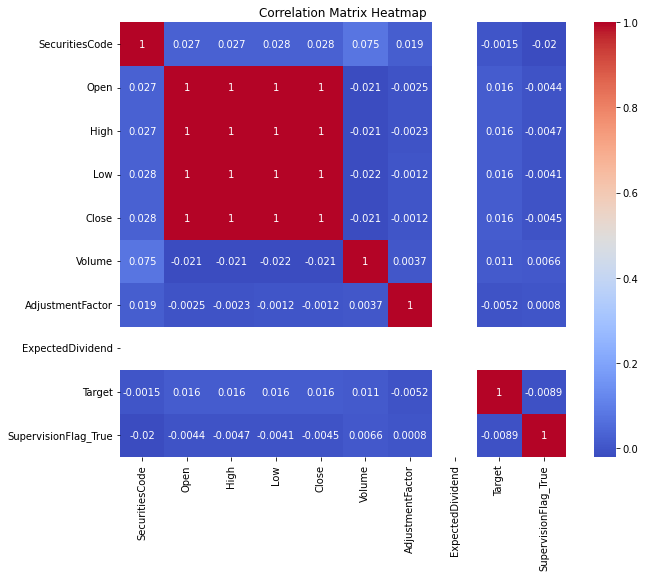

In [70]:
# Correlation matrix. Understanding how different numerical variables relate to each other can be insightful.
correlation_matrix = df.corr()

# Heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

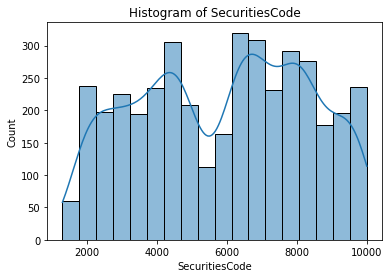

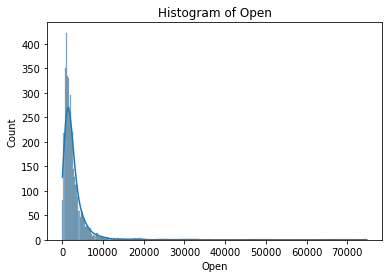

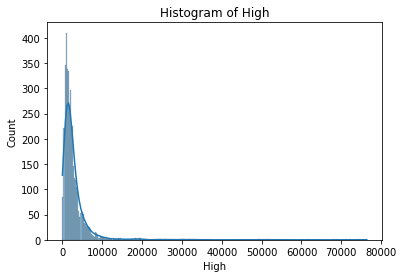

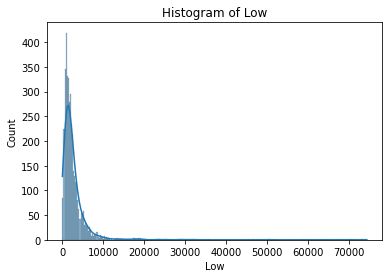

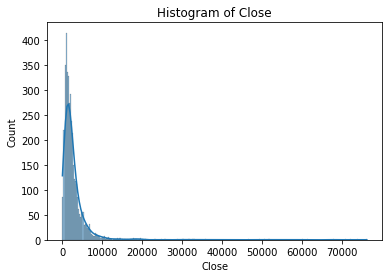

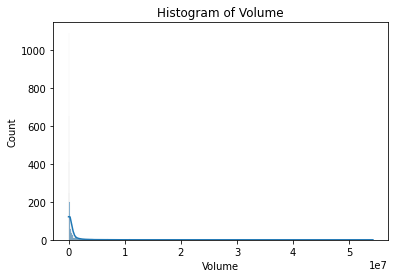

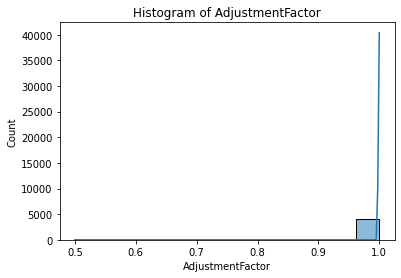

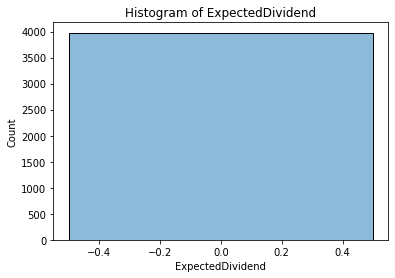

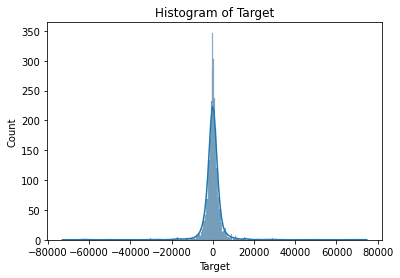

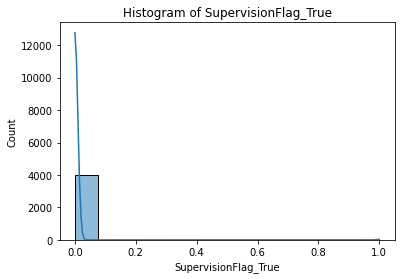

In [71]:
# Assess Distribution and Missingness


import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for numeric columns
for col in df.select_dtypes(include=['number']).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

## Data Cleaning and Preparation for Machine Learning


### The 'Open', 'High', 'Low', and 'Close' columns are important in predicting stock prices, which aligns with the project's goal of quantitative trading, while the ExpectedDividend column can impact investment decisions. This is why it is important to treat the missing values through imputation.

In [72]:
# I used the 'interpolate' function with the method parameter set to linear to handle the open, high, low, and close missing values
# This method estimates missing values as a linear fnction of neighboring data points
# Imputing with zeroes implies that when 'ExpectedDividend' is missing, there is no expected dividend for that specific day
df[['Open', 'High', 'Low', 'Close']] = df[['Open', 'High', 'Low', 'Close']].interpolate(method='linear')


In [73]:
# Impute missing values for 'ExpectedDividend' with zero
df['ExpectedDividend'].fillna(0, inplace=True)

# Check missing values for 'ExpectedDividend' again
print("Missing values for 'ExpectedDividend' after filling with zero:")
print(df['ExpectedDividend'].isnull().sum())



Missing values for 'ExpectedDividend' after filling with zero:
0


In [74]:
print("Remaining Missing Values:")
print(df.isnull().sum())



Remaining Missing Values:
RowId                   0
Date                    0
SecuritiesCode          0
Open                    0
High                    0
Low                     0
Close                   0
Volume                  0
AdjustmentFactor        0
ExpectedDividend        0
Target                  0
TargetClass             0
SupervisionFlag_True    0
dtype: int64


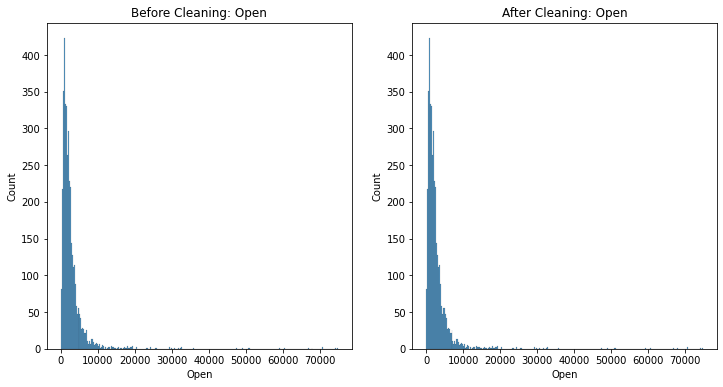

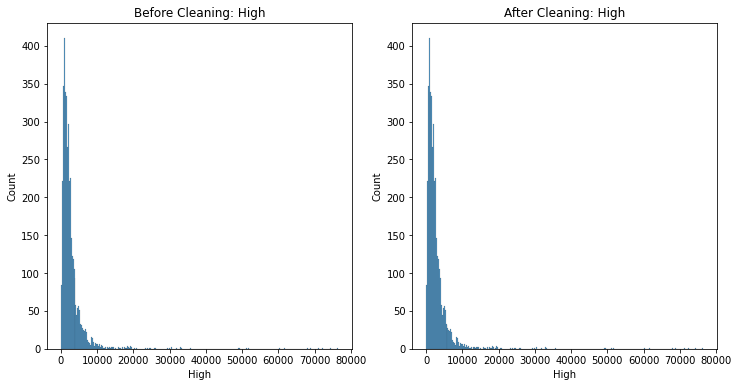

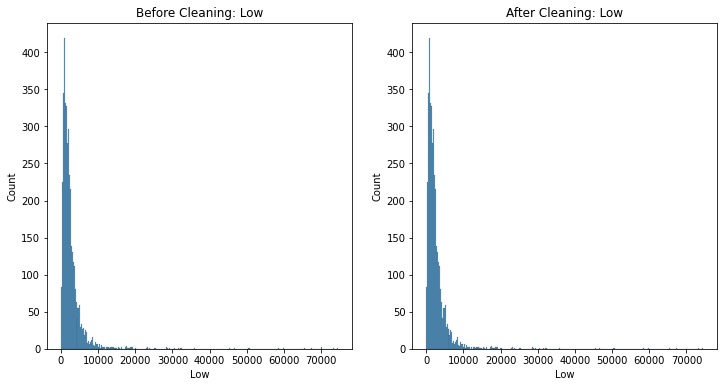

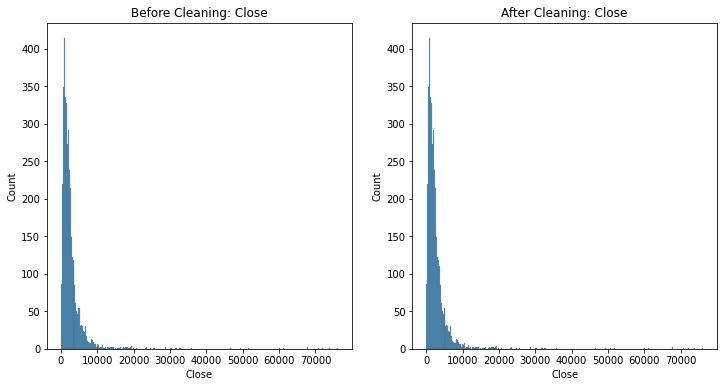

In [75]:
# Visualizing features before and after cleaning. 

import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot histograms before and after cleaning
def visualize_before_after(feature):
    plt.figure(figsize=(12, 6))

    # Before cleaning
    plt.subplot(1, 2, 1)
    plt.title(f'Before Cleaning: {feature}')
    sns.histplot(data=df_before_cleaning, x=feature)

    # After cleaning
    plt.subplot(1, 2, 2)
    plt.title(f'After Cleaning: {feature}')
    sns.histplot(data=df_after_cleaning, x=feature)

    plt.show()

# Create a copy of the original dataframe before cleaning
df_before_cleaning = df.copy()

# Cleaning steps
# (Assuming you have already executed the cleaning code)
df[['Open', 'High', 'Low', 'Close']] = df[['Open', 'High', 'Low', 'Close']].interpolate(method='linear')
df['ExpectedDividend'].fillna(0, inplace=True)

# Create a copy of the dataframe after cleaning
df_after_cleaning = df.copy()

# Visualize 'Open', 'High', 'Low', 'Close' before and after cleaning
for feature in ['Open', 'High', 'Low', 'Close']:
    visualize_before_after(feature)


### The cleaning steps did not significantly alter the distribution of the data. This indicates that the cleaning steps preserved the overall shape and characteristics of the data.

In [78]:
# One-hot encoding categorical features
df = pd.get_dummies(df, columns=['SecuritiesCode', 'SupervisionFlag_True'], drop_first=True)




In [79]:
print(df.columns)


Index(['RowId', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'AdjustmentFactor', 'ExpectedDividend', 'Target',
       ...
       'SecuritiesCode_9983', 'SecuritiesCode_9984', 'SecuritiesCode_9987',
       'SecuritiesCode_9989', 'SecuritiesCode_9990', 'SecuritiesCode_9991',
       'SecuritiesCode_9993', 'SecuritiesCode_9994', 'SecuritiesCode_9997',
       'SupervisionFlag_True_1'],
      dtype='object', length=2007)


### Machine Learning

#### Problem Formulation

### Train ML Algorithm

#### Here, we have a decision tree regressor

In [169]:
import numpy as np

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def decision_tree_regressor(X_train, y_train, X_val):
    # Find the best feature and split point based on the mean squared error
    feature_index, split_point, mse = find_best_split(X_train, y_train)

    # Check if a valid split point is found
    if feature_index is None:
        # Return the mean of the target variable as the prediction
        return {'prediction': np.mean(y_train)}

    # Split the data into two subsets based on the best split
    left_mask = X_train[:, feature_index] <= split_point
    right_mask = ~left_mask

    # Create subsets for the left and right branches
    X_left, y_left = X_train[left_mask], y_train[left_mask]
    X_right, y_right = X_train[right_mask], y_train[right_mask]

    # Recursively build the left and right branches
    left_branch = decision_tree_regressor(X_left, y_left, X_val)
    right_branch = decision_tree_regressor(X_right, y_right, X_val)

    return {'feature_index': feature_index, 'split_point': split_point,
            'left_branch': left_branch, 'right_branch': right_branch, 'mse': mse}

def find_best_split(X, y):
    num_features = X.shape[1]
    best_feature_index = None
    best_split_point = None
    best_mse = float('inf')

    for feature_index in range(num_features):
        unique_values = np.unique(X[:, feature_index])
        for split_point in unique_values:
            left_mask = X[:, feature_index] <= split_point
            right_mask = ~left_mask

            mse = calculate_mse(y[left_mask], y[right_mask])

            if mse < best_mse:
                best_feature_index = feature_index
                best_split_point = split_point
                best_mse = mse

    return best_feature_index, best_split_point, best_mse

def calculate_mse(y1, y2):
    return mean_squared_error(y1, np.mean(y1)) + mean_squared_error(y2, np.mean(y2))

def predict_tree(tree_model, X):
    predictions = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        predictions[i] = traverse_tree(tree_model, X[i])
    return predictions

def traverse_tree(node, X):
    if 'prediction' in node:
        return node['prediction']
    else:
        if X[node['feature_index']] <= node['split_point']:
            return traverse_tree(node['left_branch'], X)
        else:
            return traverse_tree(node['right_branch'], X)

# Example usage:
# Assume X_train, y_train, X_val are your training features, training labels, and validation features
# Replace these with your actual data
X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y_train = np.array([2, 4, 5, 6])
X_val = np.array([[5, 6]])

# Train the decision tree regressor
tree_model = decision_tree_regressor(X_train, y_train, X_val)

# Make predictions on the validation set
predictions = predict_tree(tree_model, X_val)
print("Predictions:", predictions)



Predictions: [6.]


### Evaluate Performance on Validation Sample

### Compute the usual metric for your ML task.
### Compute the score for the kaggle challenge.

In [170]:
# Evaluating Performance on Validation Sample

#Assuming 'y_val' is the array of actual values on the validation set

# Calculate the squared differences
squared_diff = (y_val - predictions) ** 2

# Calculate the Mean Squared Error
mse_validation = np.mean(squared_diff)
print(f'Mean Squared Error on Validation Set: {mse_validation}')


Mean Squared Error on Validation Set: 45050596.25481544


In [38]:
import numpy as np
import pandas as pd

def _calc_spread_return_per_day(df, portfolio_size, toprank_weight_ratio):
    """
    Args:
        df (pd.DataFrame): DataFrame with 'Rank' and 'Close' columns
        portfolio_size (int): # of equities to buy/sell
        toprank_weight_ratio (float): the relative weight of the most highly ranked stock compared to the least.
    Returns:
        (float): spread return
    """
    # Calculate weights
    weights = np.linspace(start=toprank_weight_ratio, stop=1, num=portfolio_size)
    
    # Ensure the 'Rank' column starts from 1
    df['Rank'] = df['Rank'] + 1
    
    # Sort DataFrame by 'Rank'
    df_sorted = df.sort_values(by='Rank')
    
    # Calculate purchase and short values
    purchase = (df_sorted['Close'][:portfolio_size] * weights).sum() / weights.mean()
    short = (df_sorted['Close'][-portfolio_size:] * weights).sum() / weights.mean()
    
    return purchase - short




In [39]:
# Calculate spread return per day
spread_return_df = df.groupby('Date').apply(_calc_spread_return_per_day, portfolio_size, toprank_weight_ratio)

# Calculate Sharpe ratio
sharpe_ratio = spread_return_df.mean() / spread_return_df.std()

# Display the Sharpe ratio
print("Sharpe Ratio:", sharpe_ratio)



Sharpe Ratio: -26.88712688070632


### A higher Sharpe ratio indicates better risk adjusted returns. A positive Sharpe ratio suggests that my strategy has generated returns in excess of the risk free rate per unit fo risk, while a negative Sharpe ratio suggests the opposite. The negative value I have indicates that the investment strategy has produced negative risk-adjusted returns during the competition period. The returns generated by my strategy have not compensated for the level of risk taken. Adjustments may be needed to improve the risk-adjusted returns of my strategy.


In [15]:
# Assuming 'predictions' is your single prediction value
rank_value = 1
df['Rank'] = rank_value

# Verify the 'Rank' column
print("Minimum Rank:", df['Rank'].min())
print("Maximum Rank:", df['Rank'].max())


Minimum Rank: 1
Maximum Rank: 1


In [25]:
print(df.head())


           RowId        Date  SecuritiesCode    Open    High     Low   Close  \
0  20211206_1301  2021-12-06            1301  2982.0  2982.0  2965.0  2971.0   
1  20211206_1332  2021-12-06            1332   592.0   599.0   588.0   589.0   
2  20211206_1333  2021-12-06            1333  2368.0  2388.0  2360.0  2377.0   
3  20211206_1375  2021-12-06            1375  1230.0  1239.0  1224.0  1224.0   
4  20211206_1376  2021-12-06            1376  1339.0  1372.0  1339.0  1351.0   

    Volume  AdjustmentFactor  ExpectedDividend  SupervisionFlag  Rank  
0     8900               1.0               NaN            False     1  
1  1360800               1.0               NaN            False     1  
2   125900               1.0               NaN            False     1  
3    81100               1.0               NaN            False     1  
4     6200               1.0               NaN            False     1  


# Apply ML to challenge test set


In [41]:
# Import the pandas library
import pandas as pd

# Load the secondary_stock_prices.csv dataset
secondary_stock_prices_df = pd.read_csv('secondary_stock_prices.csv')


In [45]:
# Display general information about the DataFrame
print(df.info())

# Display the first few rows of the DataFrame
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 4012 entries, SecuritiesCode to Date_2021-12-07
dtypes: bool(1), float64(4011)
memory usage: 122.4 MB
None
   SecuritiesCode      Open      High       Low     Close    Volume  \
0       -1.917092  0.048583  0.038549  0.053645  0.042734 -0.277533   
1       -1.904122 -0.498497 -0.499239 -0.498420 -0.499840  0.365277   
2       -1.903704 -0.091964 -0.095503 -0.086868 -0.092567 -0.221901   
3       -1.886131 -0.352457 -0.354806 -0.350707 -0.355199 -0.243203   
4       -1.885713 -0.327506 -0.324791 -0.323998 -0.326271 -0.278816   

   AdjustmentFactor  ExpectedDividend  SupervisionFlag  Rank  ...  \
0          0.015811               NaN            False   NaN  ...   
1          0.015811               NaN            False   NaN  ...   
2          0.015811               NaN            False   NaN  ...   
3          0.015811               NaN            False   NaN  ...   
4          0.015811               NaN 

In [47]:
# Step 1: Handle Missing Values
df.fillna(df.mean(), inplace=True)  # Replace missing values with the mean of each column


In [48]:
# Step 2: Normalize/Standardize Features
mean = df.mean()
std = df.std()
for col in df.columns:
    df[col] = (df[col] - mean) / std


In [50]:
# Step 4: Data Splitting
# Assuming you have a target variable named 'Close'
# Extract features and target variable
X = df.drop('Close', axis=1)  # Features
y = df['Close']  # Target variable

# Splitting the data into training and testing sets
def train_test_split_custom(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
        
    num_samples = X.shape[0]
    num_test_samples = int(test_size * num_samples)
    
    # Shuffle indices
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    
    # Split indices into training and testing sets
    test_indices = indices[:num_test_samples]
    train_indices = indices[num_test_samples:]
    
    # Split data based on indices
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    return X_train, X_test, y_train, y_test

# Using the custom train_test_split function
X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2, random_state=42)

# Now you can use X_train, X_test, y_train, y_test for training and evaluating your machine learning models

